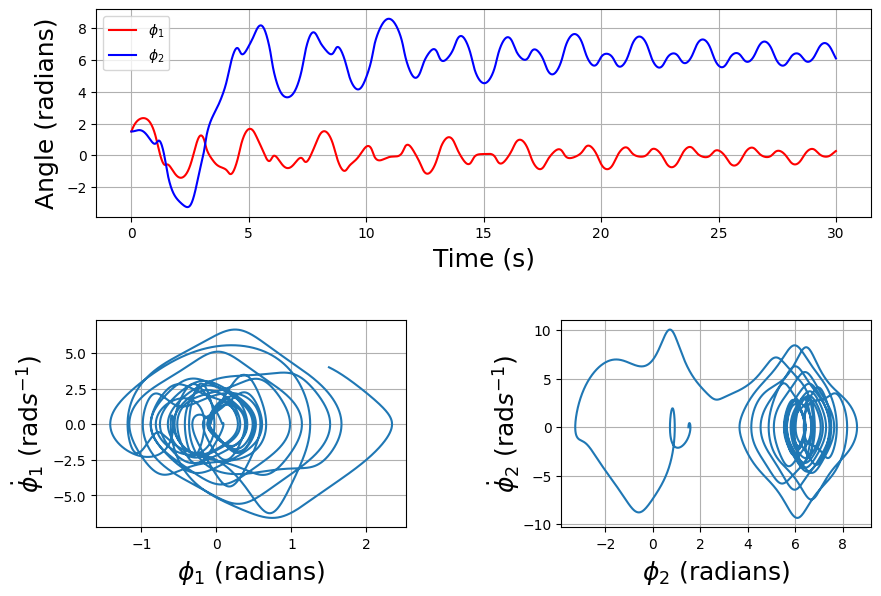

In [2]:
#double pendulum motion in the presence of air resistance
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def pendulumEq(vec,b,m): #angular acceleration equations for the double pendulum in the presence of air resistance
  phi1, phiDot1, phi2, phiDot2 = vec
  lambda1 = phi1 - phi2
  term = -np.cos(lambda1)*(phiDot1**2*np.sin(lambda1)-omega_sq*np.sin(phi2)-b/m*(phiDot1*np.cos(lambda1)+phiDot2))
  phiDotDot1=(term-phiDot2**2*np.sin(lambda1)-2*omega_sq*np.sin(phi1)-b/m*(2*phiDot1+phiDot2*np.cos(lambda1)))/(2-(np.cos(lambda1))**2)
  phiDotDot2=-np.cos(lambda1)*(phiDotDot1)+phiDot1**2*np.sin(lambda1)-omega_sq*np.sin(phi2)-b/m*(phiDot1*np.cos(lambda1)+phiDot2)
  return np.array([phiDot1, phiDotDot1, phiDot2, phiDotDot2])
def RungeKuttaCoupled(vec, dt, b, m):#used the 4th order Runge Kutta mehtod to solve angular accerlation equations
  k1 = pendulumEq(vec, b, m)
  k2 = pendulumEq(vec + dt/2 * k1, b, m)
  k3 = pendulumEq(vec + dt/2 * k2, b, m)
  k4 = pendulumEq(vec + dt * k3, b, m)
  return vec + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
g = 9.81
l = 1
b = 0.1
m = 1.0
phiInit1 = 1.5
phiInit2 = 1.5
phiDotInit1 = 4
phiDotInit2 = 0
omega_sq = g/l
t0 = 0
dt = 0.001
tEnd = 30


vec = np.array([phiInit1, phiDotInit1, phiInit2, phiDotInit2])

tList = []
phiList1 = []
phiList2 = []
phiDotList1 = []
phiDotList2 = []

t = t0

while t < tEnd:

  tList.append(t)
  phiList1.append(vec[0])
  phiDotList1.append(vec[1])
  phiList2.append(vec[2])
  phiDotList2.append(vec[3])

  vec = RungeKuttaCoupled(vec, dt,b,m)
  t = t+dt
#Plot results
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(10,7))
ax = plt.subplot(gs[0, :])
plt.plot(tList, phiList1, color='red',label=r'$\phi_1$')
plt.plot(tList, phiList2, color='blue',label=r'$\phi_2$')
plt.ylabel("Angle (radians)",fontsize=18,labelpad=5)
plt.xlabel("Time (s)",fontsize=18, labelpad=5)
plt.legend()
plt.grid()


ax = plt.subplot(gs[1, 0])
plt.plot(phiList1, phiDotList1)
plt.xlabel(r"$\phi_1$ (radians)",fontsize=18, labelpad=5)
plt.ylabel(r"$\dot{\phi}_1$ (rad$s^{-1}$)",fontsize=18,labelpad=5)
plt.grid()


ax = plt.subplot(gs[1, 1])
plt.plot(phiList2, phiDotList2)
plt.xlabel(r"$\phi_2$ (radians)", fontsize =18, labelpad=5)
plt.ylabel(r"$\dot{\phi}_2$ (rad$s^{-1}$)", fontsize=18, labelpad=0)
plt.grid()
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(top=0.85, hspace=0.5)
plt.savefig("damped_pendulum motion_.pdf")
plt.show()